### Oscillation analysis with fixed backgrounds

This notebook performs and plots the results of our oscillation analysis for MicroBooNE.
We work with appearance only, and fix the oscillation backgrounds.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from MicroTools import *
from MicroTools.plot_tools import *

In [3]:
OPERA = np.loadtxt(f"{path_osc_app}/dm41s22thmue-opera.dat")
KARMEN = np.loadtxt(f"{path_osc_app}/dm41s22thmue-karmen.dat")
SBN = np.loadtxt(f"{path_osc_app}/SBN_3sigma.csv", delimiter=",")

KARMENY = 10**np.unique(np.transpose(KARMEN)[0])
KARMENX = 10**np.unique(np.transpose(KARMEN)[1])
KARMENZ = (np.transpose(KARMEN)[2]).reshape(len(KARMENY), len(KARMENX))

OPERAY = 10**np.unique(np.transpose(OPERA)[0])
OPERAX = 10**np.unique(np.transpose(OPERA)[1])
OPERAZ = (np.transpose(OPERA)[2]).reshape(len(OPERAY), len(OPERAX))

MuB_Inclusive = np.loadtxt(f"{path_osc_app}/Inclusive_NoBkgOsc_Chi2.dat")
dm41V = np.unique(MuB_Inclusive.T[0])
ssqthV = np.unique(MuB_Inclusive.T[1])

#Asimov Expectation, Full Covariance
ch2VAs = (MuB_Inclusive.T[2]).reshape(len(dm41V), len(ssqthV))

#Asimov Expectation, After applying constraint
ch2VAsPC = (MuB_Inclusive.T[3]).reshape(len(dm41V), len(ssqthV))

#Data result, full covariance
ch2V = (MuB_Inclusive.T[4]).reshape(len(dm41V), len(ssqthV))


MB = np.loadtxt(f"{path_osc_app}/MiniBooNE_chi2.dat")
MB_dmsq = np.unique(MB.T[0])
MB_ssqt = np.unique(MB.T[1])
MB_ch2 = (MB.T[2]).reshape(len(MB_dmsq), len(MB_ssqt))

# MicroBooNE - 1e1p CCQE
MuB_ccqe    = {}
dm41V_ccqe  = {}
ssqthV_ccqe = {}
Um4V_ccqe   = {}
ch2V_ccqe   = {}
for j, f in enumerate([f"{path_osc_app}/CCQE_noBkgOsc_Chi2_Data.dat",
                        f"{path_osc_app}/CCQE_noBkgOsc_Chi2_Asimov.dat"]):
    MuB_ccqe[j]    = np.loadtxt(f)
    dm41V_ccqe[j]  = 10**np.unique(MuB_ccqe[j].T[0])
    ssqthV_ccqe[j] = 10**np.unique(MuB_ccqe[j].T[1])
    Um4V_ccqe[j]   = np.unique(MuB_ccqe[j].T[2])
    MuB_ccqe[j]    = np.array(np.split(MuB_ccqe[j], len(MuB_ccqe[j])/len(Um4V_ccqe[j]))) # split by (dm41,ssqth)
    MuB_ccqe[j]    = MuB_ccqe[j][np.arange(len(MuB_ccqe[j])),
                                 np.argmin(MuB_ccqe[j][:,:,3], axis=1).T,
                                 :][:,[0,1,3]] # take minimum over all Um4 values for fixed (dm41, ssqth)
    ch2V_ccqe[j]   = np.split(MuB_ccqe[j][:,-1], len(MuB_ccqe[j])/len(ssqthV_ccqe[j]))

In [4]:
CCQEDat = ch2V_ccqe[0]
CCQEDatTrim = CCQEDat[10:][0:40]

CCQEAs = ch2V_ccqe[1]
CCQEAsTrim = CCQEAs[10:][0:40]

In [5]:
# Standard style

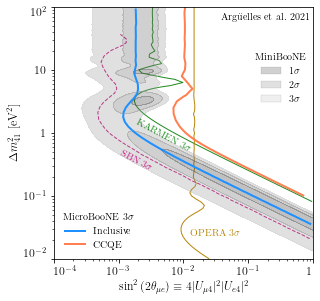

In [10]:
from MicroTools.plot_tools import *

fig, ax = std_fig(figsize=(std_figsize[0], std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e2

ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu e}\right)\equiv 4|U_{\mu 4}|^2 |U_{e4}|^2$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1, 10, 100)))
ax.tick_params(direction='out')
ax.tick_params(direction='out', which='minor')
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"))
ax.set_yticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"))

####################
# plot data

levs = [np.min(ch2V) + 11.83]
ax.contour(ssqthV, dm41V, ch2V, levels=levs, linestyles=['-'], colors=['dodgerblue'], linewidths=2)
levs_ccqe   = [np.min(CCQEDatTrim) + 11.83]
ax.contour(ssqthV_ccqe[0], (dm41V_ccqe[0])[10:], CCQEDatTrim, levels=levs_ccqe, linestyles=['-'], colors=['coral'], linewidths=2)

levs0MB = np.min(MB_ch2)
levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
ax.contourf(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.3)
ax.contour(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=1, linewidths=0.25)

ax.plot(SBN.T[0], SBN.T[1], color='mediumvioletred', ls='--', lw=1, zorder=0)
ax.contour(KARMENX, KARMENY, KARMENZ, levels=[np.min(KARMENZ)+11.83], colors='forestgreen', linestyles='-', linewidths=1, zorder=0)
ax.contour(OPERAX, OPERAY, OPERAZ, levels=[np.min(OPERAZ)+11.83], colors='darkgoldenrod', linestyles='-', linewidths=1, zorder=0)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', label=r"{Inclusive}")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='coral', label=r"{CCQE}")

colors=['#666666', '#999999', '#CCCCCC']
labels=[r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']


#########
# labels and legens 
proxy = [plt.Rectangle((0,0),1,1,fc =colors[i], ec='black', label=labels[i], alpha=0.3, lw=0.25) for i in range(3)]
leg2 = ax.legend(proxy, labels, fontsize=fsize_annotate, title=r"MiniBooNE", loc=(0.76,0.6))
leg1 = ax.legend(loc='lower left', title=r"MicroBooNE $3\sigma$", title_fontsize = fsize_annotate, frameon=False)
plt.gca().add_artist(leg2)


ax.annotate(r"Arg\"{u}elles\ et\ al.\ 2021", xy=(xmax, ymax), xytext=(-3, -6), textcoords="offset points", ha="right", va="top", size=fsize_annotate, color='k')

keyargs = {'textcoords': "data", 'ha': "left", 'va':"bottom", 'size': fsize_annotate}
# ax.annotate(r"MB $1\sigma$", xy=(1.5e-4, 3), color='#333333')
# ax.annotate(r"$2\sigma$", xy=(1.5e-4, 2), color='#666666')
# ax.annotate(r"$3\sigma$", xy=(1.5e-4, 1.2), color='#999999')

ax.annotate(r"SBN $3\sigma$", xy=(1e-3,0.24), color='mediumvioletred', rotation=-28, **keyargs)
ax.annotate(r"OPERA $3\sigma$", xy=(1.25e-2, 2.2e-2), color="darkgoldenrod", **keyargs)
ax.annotate(r"KARMEN $3\sigma$", xy=(1.8e-3,0.47), color="forestgreen", rotation=-28, **keyargs)
flushalign(ax)

# save figure
fig.savefig(f"{path_plots}/Fig3/Fig_3_v2.pdf", bbox_inches='tight')


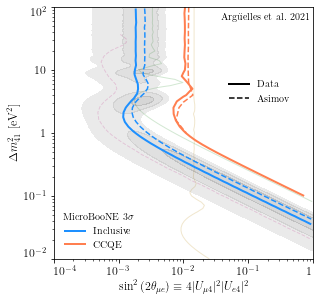

In [13]:
from MicroTools.plot_tools import *

fig, ax = std_fig(figsize=(std_figsize[0], std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e2

ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu e}\right)\equiv 4|U_{\mu 4}|^2 |U_{e4}|^2$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1, 10, 100)))
ax.tick_params(direction='out')
ax.tick_params(direction='out', which='minor')
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"))
ax.set_yticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"))

##############
# Plot data
levs = [np.min(ch2V) + 11.83]
ax.contour(ssqthV, dm41V, ch2V, levels=levs, linestyles=['-'], colors=['dodgerblue'], linewidths=2)
levsAs = [np.min(ch2VAs) + 11.83]
ax.contour(ssqthV, dm41V, ch2VAs, levels=levsAs, linestyles=['--'], colors=['dodgerblue'], linewidths=1.5)

levs_ccqe   = [np.min(CCQEDatTrim) + 11.83]
ax.contour(ssqthV_ccqe[0], (dm41V_ccqe[0])[10:], CCQEDatTrim, levels=levs_ccqe, linestyles=['-'], colors=['coral'], linewidths=2)
levsAs_ccqe = [np.min(CCQEAsTrim) + 11.83]
ax.contour(ssqthV_ccqe[1], (dm41V_ccqe[1])[10:], CCQEAsTrim, levels=levsAs_ccqe, linestyles=['--'], colors=['coral'], linewidths=1.5)

levs0MB = np.min(MB_ch2)
levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
ax.contourf(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.2)

ax.plot(SBN.T[0], SBN.T[1], color='mediumvioletred', ls='--', lw=1, zorder=0, alpha=0.2)
ax.contour(KARMENX, KARMENY, KARMENZ, levels=[np.min(KARMENZ)+11.83], colors='forestgreen', linestyles='-', linewidths=1, zorder=0, alpha=0.2)
ax.contour(OPERAX, OPERAY, OPERAZ, levels=[np.min(OPERAZ)+11.83], colors='darkgoldenrod', linestyles='-', linewidths=1, zorder=0, alpha=0.2)

#########
# labels and legens 
h = []
h.append(plt.plot([], [], color='k', ls='-', lw=2)[0])
h.append(plt.plot([], [], color='k', ls='--', lw=1.5)[0])
leg2 = plt.legend(handles=h, labels=[r"$\mathrm{Data}$", r"$\mathrm{Asimov}$"], fontsize=fsize_annotate, framealpha=1.0, loc=(0.66,0.6))
ax.add_artist(leg2)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', label=r"$\mathrm{Inclusive}$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='coral', label=r"$\mathrm{CCQE}$")
leg = ax.legend(loc=3, framealpha=1.0, title=r"$\mathrm{MicroBooNE\ 3\sigma}$", fontsize = fsize_annotate)

ax.annotate(r"Arg\"{u}elles\ et\ al.\ 2021", xy=(xmax, ymax), xytext=(-3, -6), textcoords="offset points", ha="right", va="top", size=fsize_annotate, color='k')
flushalign(ax)

# save figure
fig.savefig(f"{path_plots}/Fig3/FigSuppl_1_v2.pdf", bbox_inches='tight')